Previously we distributed all available bonding electrons completely randomly across all possible edges. This worked well for propanol, but when the number of heavy atoms (and therefore number of edges) was increased in butanol, the number of permuations went through the roof and this method became completely unfeasible.

**Introducing stepwise logic to random edge connection update**

_Now we narrow the problem down by taking a (random) atom at a time, filling its edges with available bonding electrons then checking the overall valency is not violated and if it is not, then moving onto the next atom and doing the same. If the valency is affected, the search will try again using the same updated edges that it was given when starting on that atom. However, if after 20 attempts it has still not found an electronic arrangement that satisfies chemical valency, the search will reset and go again._

_When it has been 1000 iterations since the last valid and unique molecule was found, we assume that all avenues have been explored and all possible structures identified and the search is terminated._

In [8]:
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot as plt

import torch
import dgl
import networkx as nx

In [9]:
import sys
sys.path.append('/home/benhonore/molecular_generator/molecular_generator/')

import make_molecules as mm
from random_generator import draw_graph_connectivity

**EXAMPLES**

**Propan-1-ol**

/home/benhonore/miniconda3/envs/gtn/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


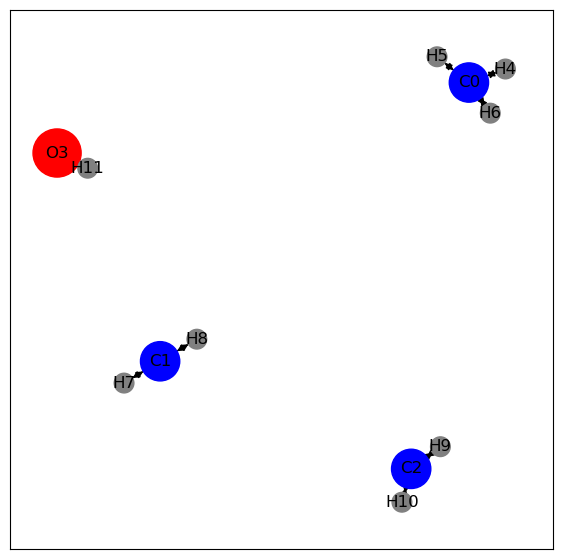

In [10]:
df = pd.read_pickle('small_molecules_testing/propan_1_ol.pkl')
graph, mask = mm.make_full_graph(df)
draw_graph_connectivity(graph)

These are the starting fragments - we have taken every bonded hydrogen as given. In the case of C-H this is with the idea that HSQC data will be available as well as NMR data. In the case of O and other heteroatoms, it is currently for simplicity.

In [11]:
mols, lmf, count = mm.find_molecules(df, 3)

{0: 1, 1: 2, 2: 2, 3: 1}
C1 : 2 bonds
dict:{0: 1, 1: 2, 2: 2, 3: 1}
{0: 1, 1: 0, 2: 1, 3: 0}
C2 : 3 bonds
dict:{0: 1, 1: 0, 2: 1, 3: 0}
{0: 0, 1: 0, 2: 0, 3: 0}
MOLECULE FOUND

{0: 1, 1: 2, 2: 2, 3: 1}
O3 : 1 bonds
dict:{0: 1, 1: 2, 2: 2, 3: 1}
{0: 1, 1: 1, 2: 2, 3: 0}
C0 : 3 bonds
dict:{0: 1, 1: 1, 2: 2, 3: 0}
{0: 0, 1: 0, 2: 2, 3: 0}
C0 : 4 bonds
dict:{0: 0, 1: 0, 2: 2, 3: 0}
C2 : 2 bonds
dict:{0: 0, 1: 0, 2: 2, 3: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 1, 1: 1, 2: 0, 3: 0}
C0 : 3 bonds
dict:{0: 1, 1: 1, 2: 0, 3: 0}
bad valency
1
{0: 0, 1: 0, 2: 0, 3: 0}
MOLECULE FOUND

{0: 1, 1: 2, 2: 2, 3: 1}
C1 : 2 bonds
dict:{0: 1, 1: 2, 2: 2, 3: 1}
bad valency
1
{0: 1, 1: 0, 2: 0, 3: 1}
O3 : 1 bonds
dict:{0: 1, 1: 0, 2: 0, 3: 

The search has found three molecules.

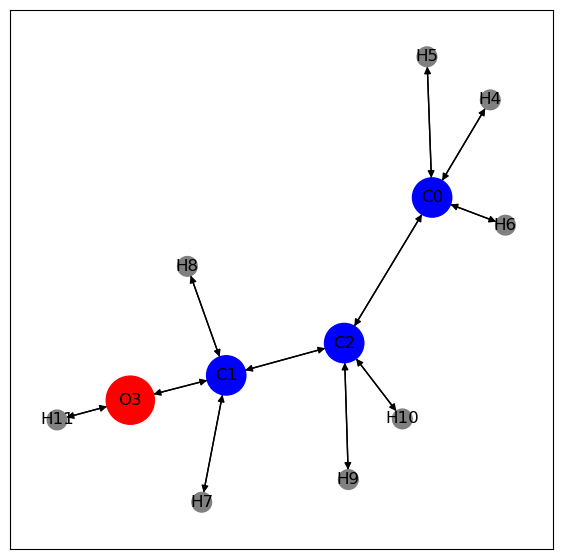

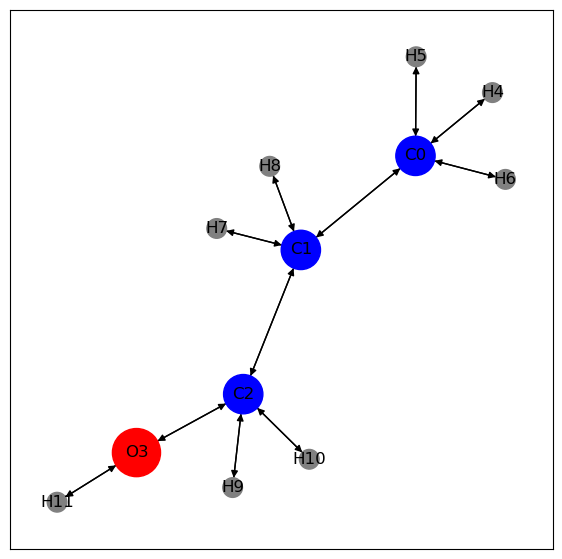

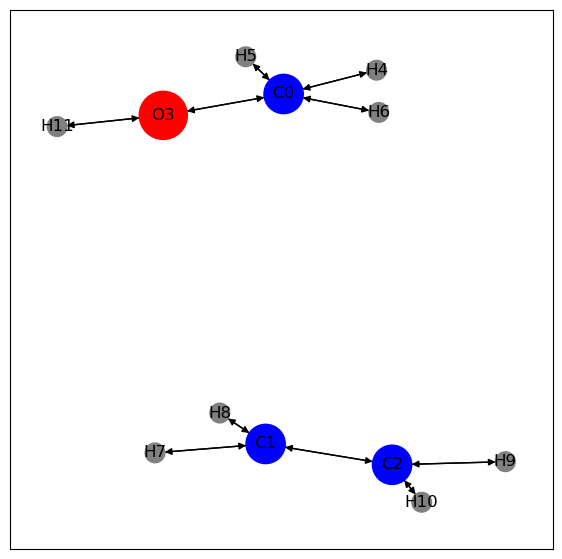

In [12]:
for mol in mols:
    draw_graph_connectivity(mol)

These are the three possible real molecules given the combination of fragments. In this case, I knew that there would be 3, so I set the aim to 3. However, if I don't know how many molecules to expect, I pass in a high aim and the search engine will try to fill it. If (as mentioned earlier) it goes 1000 iterations without finding a new, unique molecule, it will terminate the search.

**Pentan-2-ol**

/home/benhonore/miniconda3/envs/gtn/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


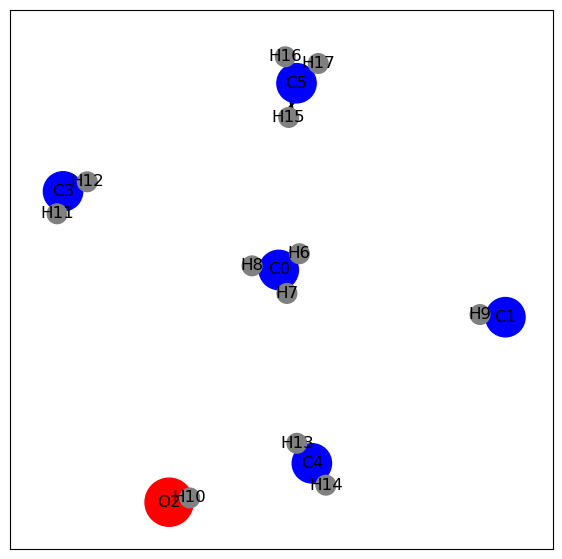

In [13]:
df=pd.read_pickle('small_molecules_testing/pentan_2_ol.pkl')
graph, mask = mm.make_full_graph(df)
draw_graph_connectivity(graph)

In [14]:
mols, lmf, count = mm.find_molecules(df, 200)

{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
C4 : 2 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 1, 1: 3, 2: 1, 3: 1, 4: 0, 5: 0}
C5 : 4 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 1, 4: 0, 5: 0}
O2 : 1 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 1, 4: 0, 5: 0}
{0: 0, 1: 3, 2: 0, 3: 1, 4: 0, 5: 0}
O2 : 2 bonds
dict:{0: 0, 1: 3, 2: 0, 3: 1, 4: 0, 5: 0}
C0 : 4 bonds
dict:{0: 0, 1: 3, 2: 0, 3: 1, 4: 0, 5: 0}
C5 : 4 bonds
dict:{0: 0, 1: 3, 2: 0, 3: 1, 4: 0, 5: 0}
C5 : 4 bonds
dict:{0: 0, 1: 3, 2: 0, 3: 1, 4: 0, 5: 0}
C0 : 4 bonds
dict:{0: 0, 1: 3, 2: 0, 3: 1, 4: 0, 5: 0}
C1 : 1 bonds
dict:{0: 0, 1: 3, 2: 0, 3: 1, 4: 0, 5: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 1, 1: 0, 2: 0, 3: 2, 4: 1, 5: 0}
C0 : 3 bonds
dict:{0: 1, 1: 0, 2: 0, 3: 2, 4: 1, 5:

C1 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0}
C1 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0}
C5 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0}
C3 : 2 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 5: 1}
C3 : 4 bonds
dict:{0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 5: 1}
C3 : 4 bonds
dict:{0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 5: 1}
C4 : 3 bonds
dict:{0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 5: 1}
{0: 1, 1: 2, 2: 0, 3: 0, 4: 0, 5: 1}
C1 : 2 bonds
dict:{0: 1, 1: 2, 2: 0, 3: 0, 4: 0, 5: 1}
bad valency
1
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
C0 : 3 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 0, 1: 3, 2: 0, 3: 2, 4: 2, 5: 1}


{0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0}
C0 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0}
C3 : 2 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 0, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0}
C1 : 1 bonds
dict:{0: 0, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
C0 : 3 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 0, 1: 3, 2: 1, 3: 1, 4: 2, 5: 1}
C1 : 1 bonds


MOLECULE FOUND

{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
C0 : 3 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 0, 1: 3, 2: 0, 3: 2, 4: 2, 5: 1}
C5 : 3 bonds
dict:{0: 0, 1: 3, 2: 0, 3: 2, 4: 2, 5: 1}
bad valency
1
{0: 0, 1: 2, 2: 0, 3: 2, 4: 2, 5: 0}
C1 : 2 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 2, 4: 2, 5: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C1 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C4 : 2 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 1, 1: 2, 2: 1, 3: 2, 4: 0, 5: 0}
C4 : 4 bonds
dict:{0: 1, 1: 2, 2: 1, 3: 2, 4: 0, 5: 0}
C0 : 3 bonds
dict:{0: 1, 1: 2, 2: 1, 3: 2, 4: 0, 5: 0}
{0: 0, 1: 2, 2: 1, 3: 1, 4: 0, 5: 0}
C1 : 2 bonds
dict:{0: 0, 1: 2, 2: 1, 3: 1, 4: 0, 5: 0}
ba

{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
C0 : 3 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 0, 1: 3, 2: 1, 3: 2, 4: 1, 5: 1}
C4 : 3 bonds
dict:{0: 0, 1: 3, 2: 1, 3: 2, 4: 1, 5: 1}
{0: 0, 1: 3, 2: 1, 3: 1, 4: 0, 5: 1}
C0 : 4 bonds
dict:{0: 0, 1: 3, 2: 1, 3: 1, 4: 0, 5: 1}
C5 : 3 bonds
dict:{0: 0, 1: 3, 2: 1, 3: 1, 4: 0, 5: 1}
bad valency
1
bad valency
2
bad valency
3
{0: 0, 1: 2, 2: 1, 3: 1, 4: 0, 5: 0}
C1 : 2 bonds
dict:{0: 0, 1: 2, 2: 1, 3: 1, 4: 0, 5: 0}
bad valency
1
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
MOLECULE FOUND

{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
O2 : 1 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 1, 1: 3, 2: 0, 3: 2, 4: 2, 5: 0}
C3 : 2 bonds
dict:{0: 1, 1: 3, 2: 0, 3: 2, 4: 2, 5: 0}
bad valency
1
bad valency
2
bad valency
3
{0: 1, 1: 2, 2: 0, 3: 0, 4: 1, 5: 0}
O2 : 2 bonds
dict:{0: 1, 1: 2, 2: 0, 3: 0, 4: 1, 5: 0}
C4 : 3 bonds
dict:{0: 1, 1: 2, 2: 0, 3: 0, 4: 1, 5: 0}
{0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0}
C3 : 4 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0}
C1 

bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
bad valency
22
{0: 0, 1: 0, 2: 1, 3: 2, 4: 1, 5: 0}
C0 : 4 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 2, 4: 1, 5: 0}
C5 : 4 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 2, 4: 1, 5: 0}
C5 : 4 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 2, 4: 1, 5: 0}
C0 : 4 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 2, 4: 1, 5: 0}
C3 : 2 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 2, 4: 1, 5: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
O2 : 1 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 1, 1: 2, 2: 0, 3: 2, 4: 2, 5: 1}
O2 : 2 bonds
dict:{0: 1, 1: 2, 2: 0, 3: 2, 4: 2, 5: 1}
C0 : 3 bonds
dict:{0: 1, 1: 2, 2: 0, 3: 2, 4: 2, 5: 1}
{0: 0, 1: 2, 2: 0, 3: 2, 4: 2, 5: 0}
C1 : 2 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 2, 4: 2, 5: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0}
C4 : 3 bonds
dict:{0: 0, 1: 0, 2: 

bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
{0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0}
C4 : 4 bonds
dict:{0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0}
C3 : 4 bonds
dict:{0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0}
O2 : 1 bonds
dict:{0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0}
bad valency
1
bad valency
2
bad valency
3
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
C1 : 1 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 1, 1: 0, 2: 1, 3: 0, 4: 2, 5: 0}
C3 : 4 bonds
dict:{0: 1, 1: 0, 2: 1, 3: 0, 4: 2, 5: 0}
C1 : 4 bonds
dict:{0: 1, 1: 0, 2: 1, 3: 0, 4: 2, 5: 0}
C0 : 3 bonds
dict:{0: 1, 1: 0, 2: 1, 3: 0, 4: 2, 5: 0}
bad valency
1
{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C4 : 2 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
ba

{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
C0 : 3 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 0, 1: 3, 2: 0, 3: 2, 4: 2, 5: 1}
C3 : 2 bonds
dict:{0: 0, 1: 3, 2: 0, 3: 2, 4: 2, 5: 1}
bad valency
1
{0: 0, 1: 1, 2: 0, 3: 0, 4: 2, 5: 1}
O2 : 2 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 2, 5: 1}
C0 : 4 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 2, 5: 1}
C3 : 4 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 2, 5: 1}
C0 : 4 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 2, 5: 1}
C3 : 4 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 2, 5: 1}
O2 : 2 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 2, 5: 1}
C5 : 3 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 2, 5: 1}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
O2 : 2 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C3 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C0 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
O2 : 2 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C0 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C0 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C5 : 4 bonds


bad valency
20
bad valency
21
{0: 1, 1: 1, 2: 0, 3: 1, 4: 2, 5: 1}
C5 : 3 bonds
dict:{0: 1, 1: 1, 2: 0, 3: 1, 4: 2, 5: 1}
{0: 1, 1: 0, 2: 0, 3: 1, 4: 2, 5: 0}
C5 : 4 bonds
dict:{0: 1, 1: 0, 2: 0, 3: 1, 4: 2, 5: 0}
C0 : 3 bonds
dict:{0: 1, 1: 0, 2: 0, 3: 1, 4: 2, 5: 0}
bad valency
1
bad valency
2
{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C3 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C5 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C1 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C0 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C3 : 4 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
C4 : 2 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 0, 1: 3, 2: 0, 3: 2, 4: 0,

C0 : 3 bonds
dict:{0: 1, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0}
{0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0}
C5 : 4 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0}
O2 : 2 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0}
C0 : 4 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0}
C3 : 4 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0}
C5 : 4 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0}
C1 : 2 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 1, 1: 0, 2: 1, 3: 2, 4: 0, 5: 0}
C1 : 4 bonds
dict:{0: 1, 1: 0, 2: 1, 3: 2, 4: 0, 5: 0}
O2 : 1 bonds
dict:{0: 1, 1: 0, 2: 1, 3: 2, 4: 0, 5: 0}
bad valency
1
bad valency
2
{0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0}
C3 : 3 bonds
dict:{0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0}
bad v

{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
C1 : 1 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
bad valency
1
{0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 1}
C0 : 4 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 1}
C5 : 3 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 1}
{0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0}
C1 : 4 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0}
C3 : 3 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
C5 : 3 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 1, 1: 3, 2: 0, 3: 2, 4: 2, 5: 0}
C5 : 4 bonds
dict:{0: 1, 1: 3, 2: 0, 3: 2, 4: 2, 5: 0}
C5 : 4 bonds
dict:{0: 1, 1: 3, 2: 0, 3: 2, 4: 2, 5: 0}
C3 : 2 bonds
dict:{0: 1, 1: 3, 2: 0, 3: 2, 4: 2, 5: 0}
{0: 0, 1: 3, 2: 0, 3: 0, 4: 1, 5: 0}
C1 : 1 bonds
dict:{0: 0, 1: 3, 2: 0, 3: 0, 4: 1, 5: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad va

{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
O2 : 1 bonds
dict:{0: 1, 1: 3, 2: 1, 3: 2, 4: 2, 5: 1}
{0: 0, 1: 3, 2: 0, 3: 2, 4: 2, 5: 1}
C3 : 2 bonds
dict:{0: 0, 1: 3, 2: 0, 3: 2, 4: 2, 5: 1}
bad valency
1
{0: 0, 1: 2, 2: 0, 3: 0, 4: 2, 5: 0}
O2 : 2 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 0, 4: 2, 5: 0}
C5 : 4 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 0, 4: 2, 5: 0}
C1 : 2 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 0, 4: 2, 5: 0}
bad valency
1
bad valency
2
1000 iterations since last molecule found: 26 molecules found.


In [15]:
len(mols)

26

Here, I set the aim high because I wasn't sure how many possible combinations there were. As it turned out, there were 28. This search took around 10 seconds.

In [16]:
lmf[-1]

1374

In [17]:
count

2375

The last real, unique molecule was found after 3006 iterations and so after the 4007th iteration, the search terminated. This approach is limited in that it is possible that some (very few but some) molecules might get missed, especially for larger molecules. But this is a necessary step to ensure that we don't spend hours waiting for searches to complete.

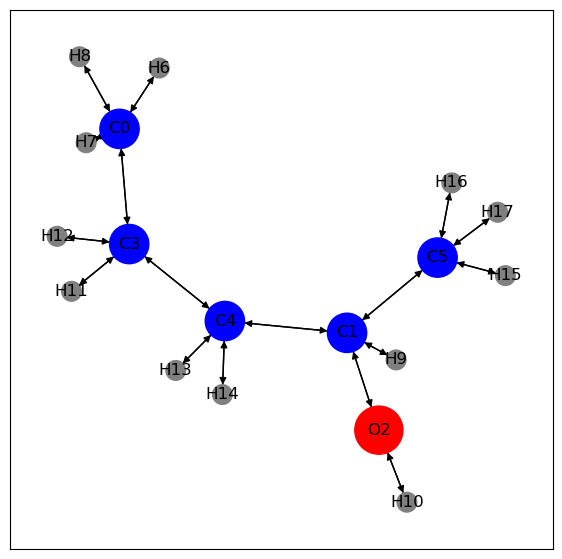

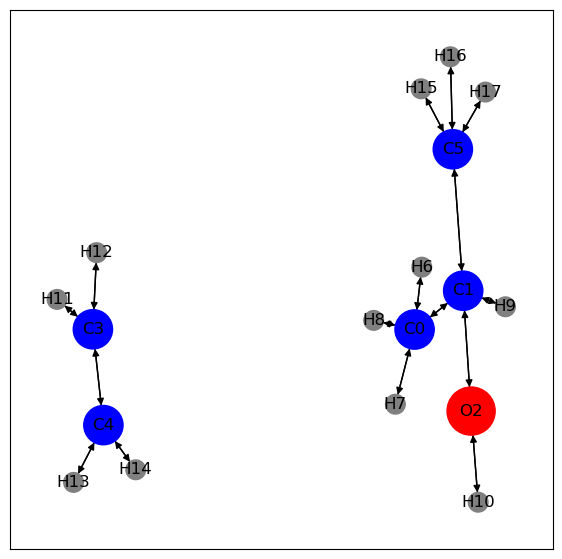

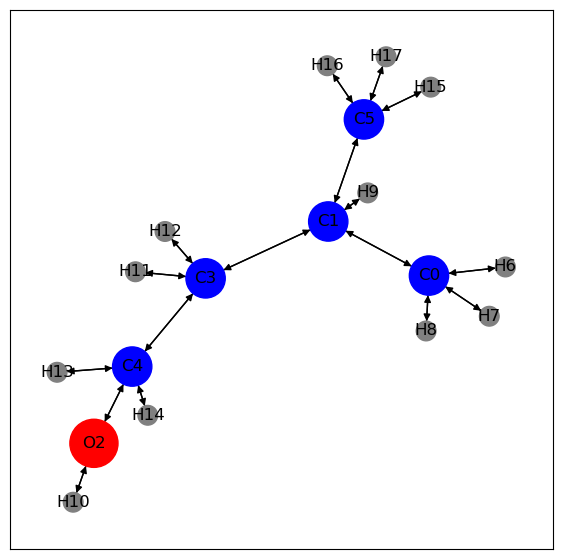

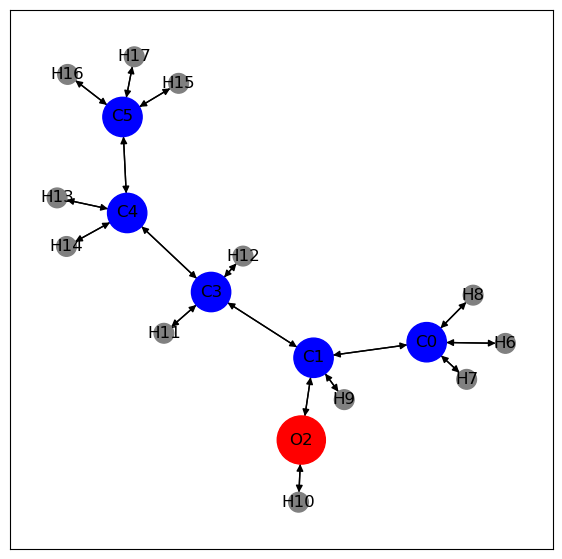

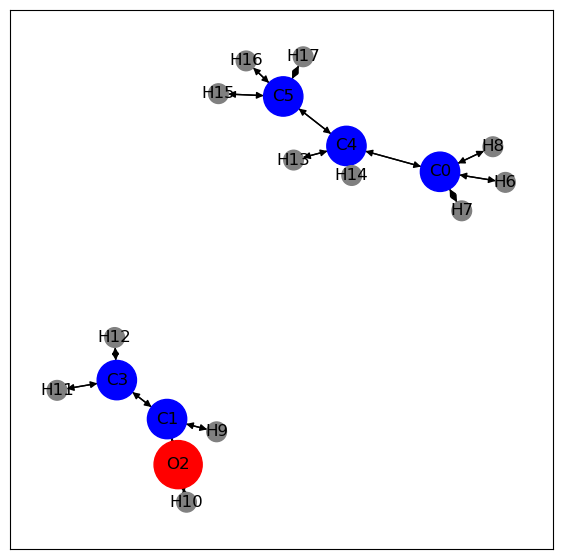

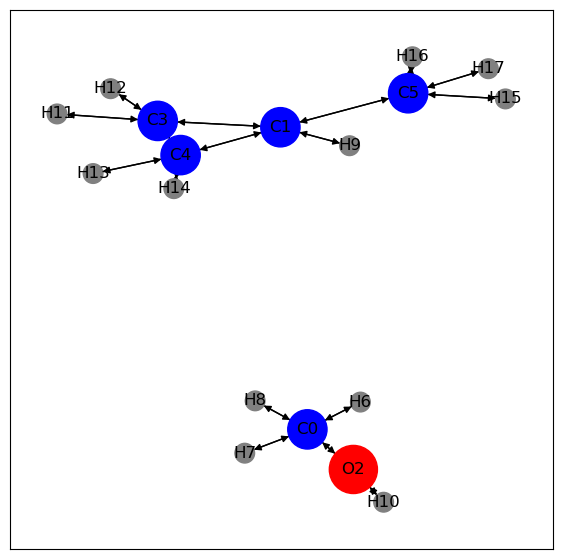

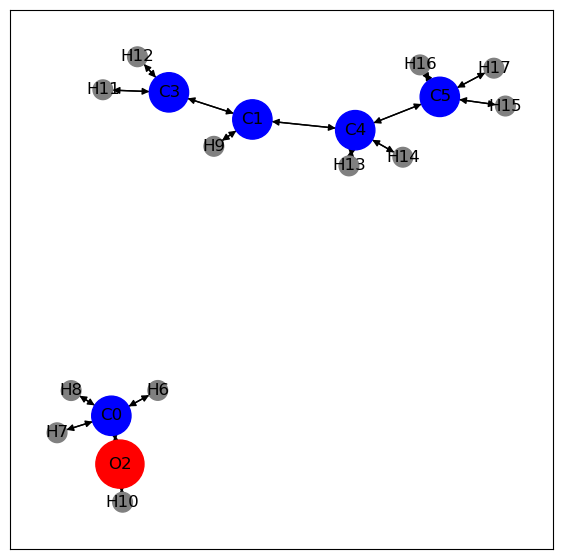

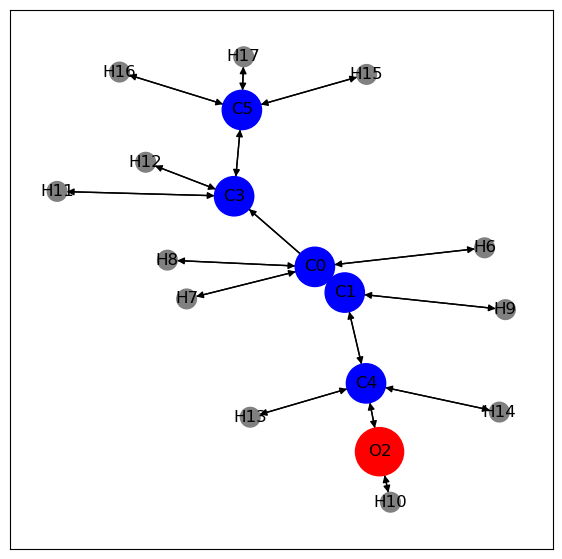

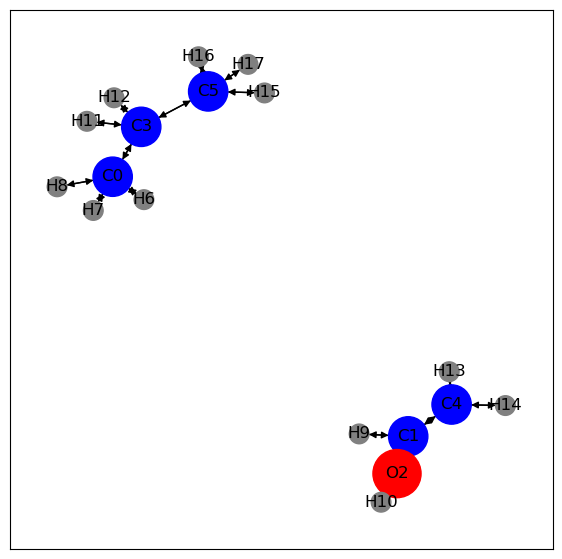

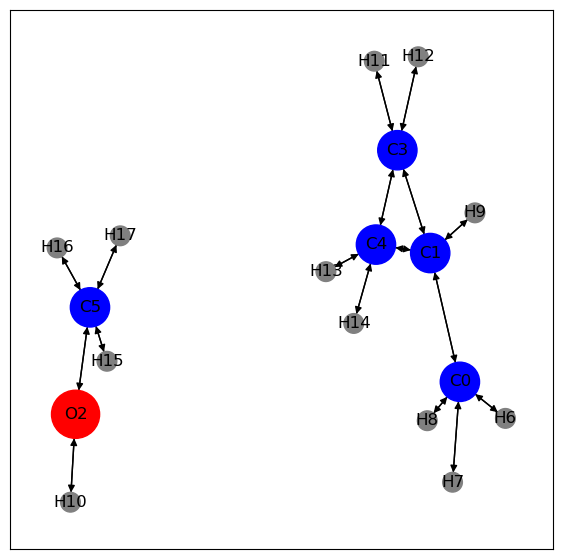

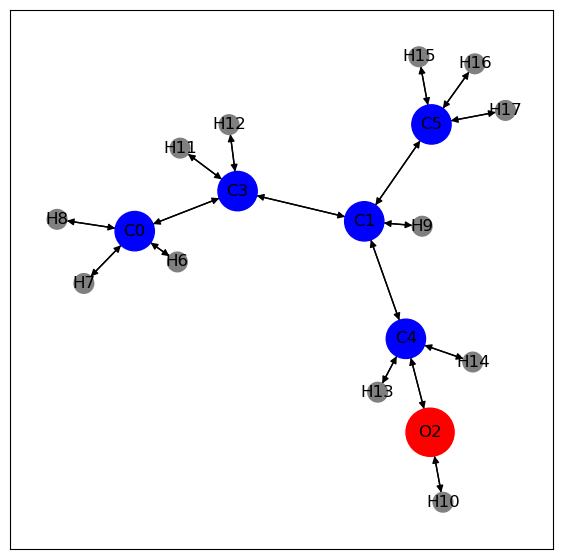

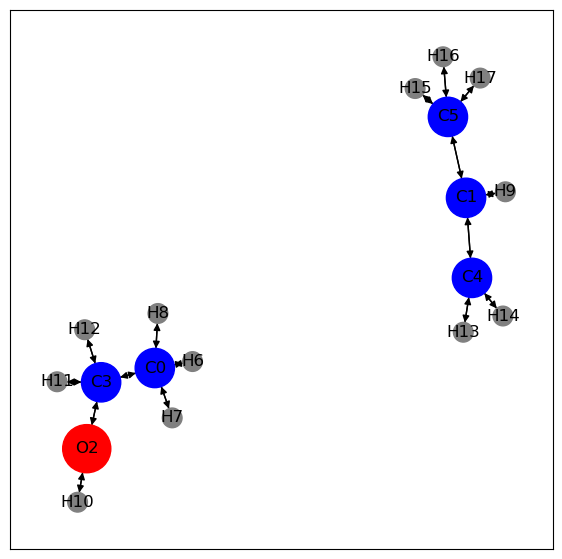

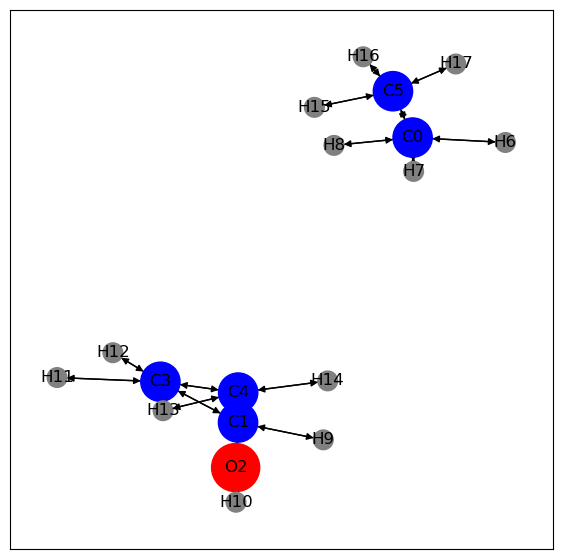

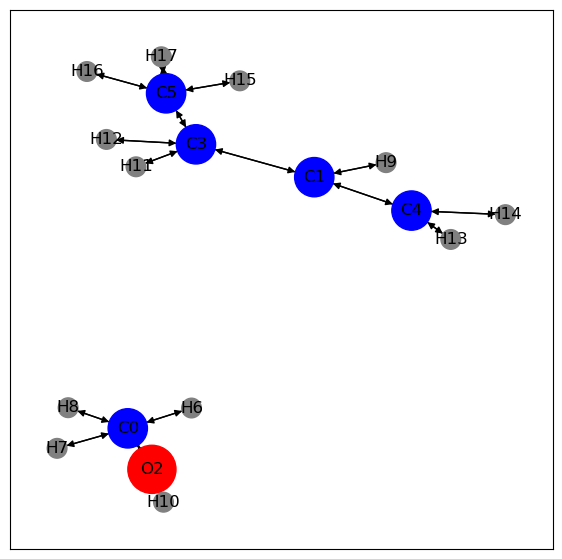

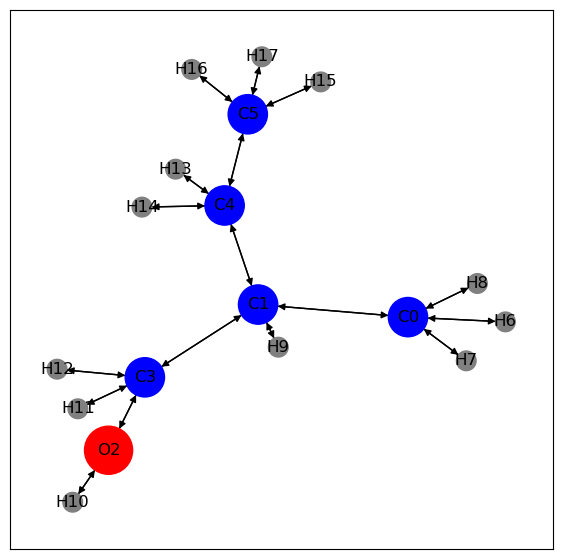

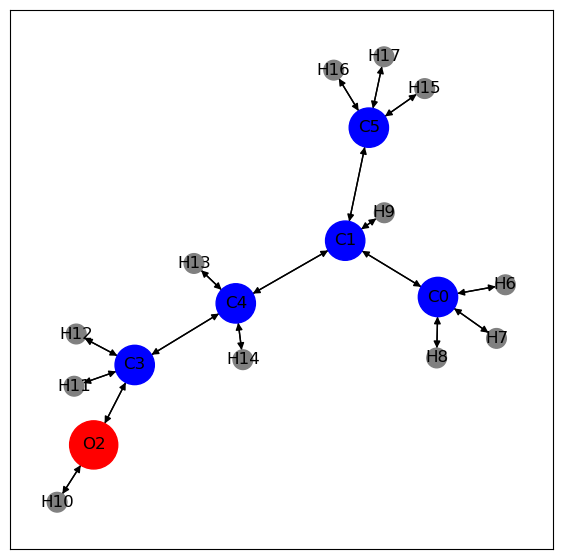

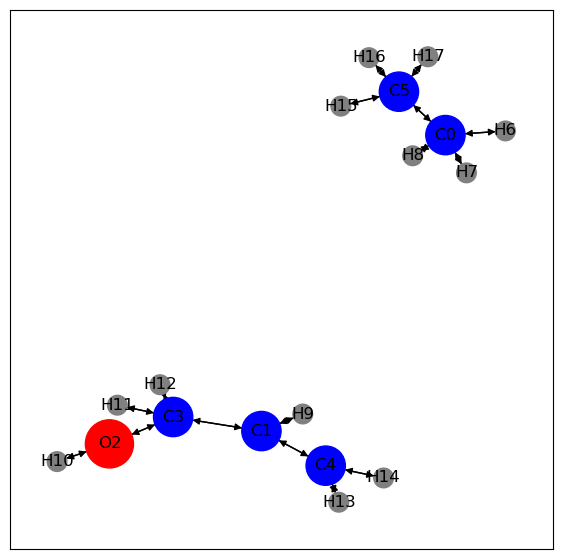

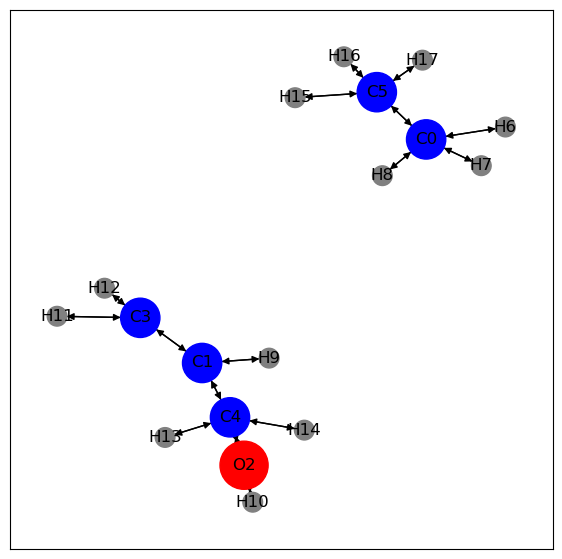

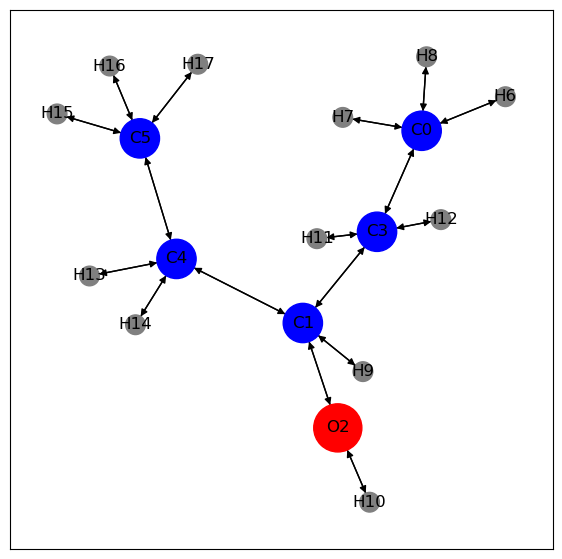

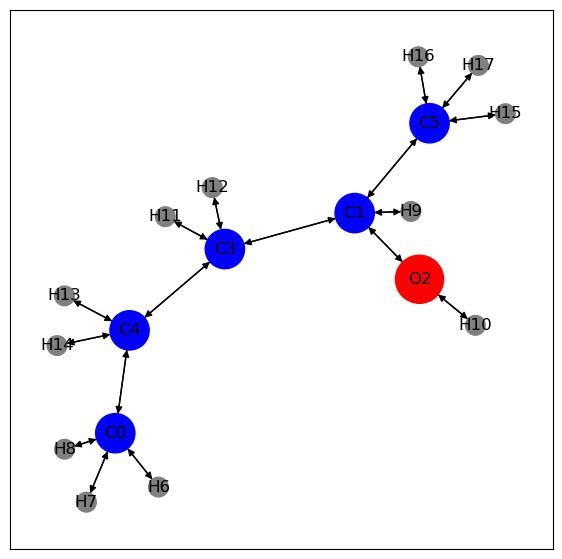

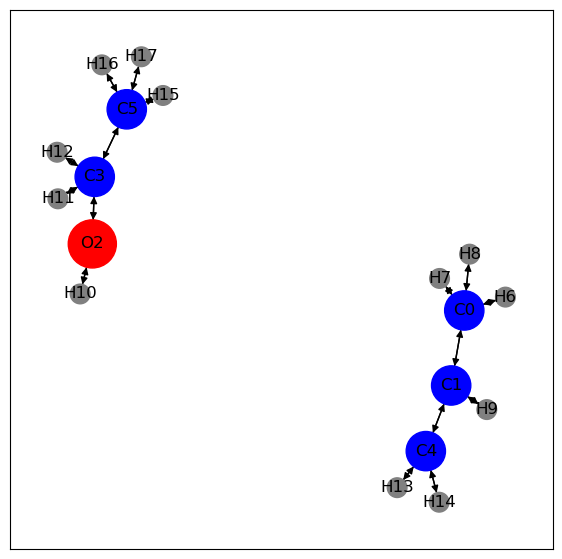

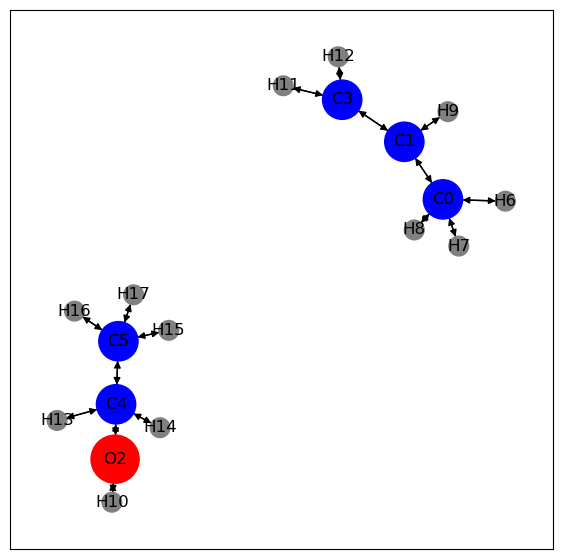

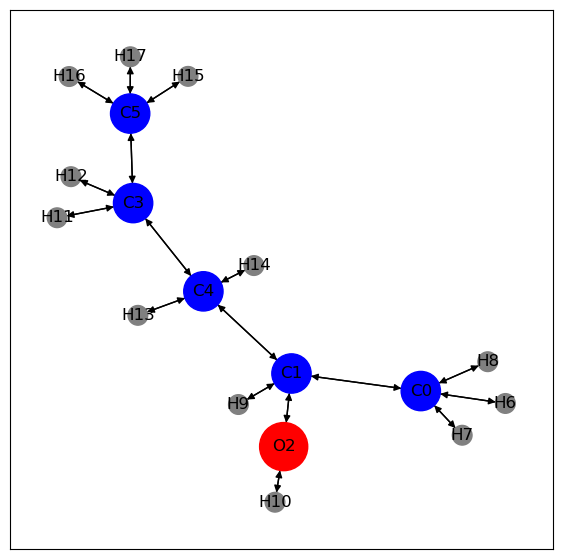

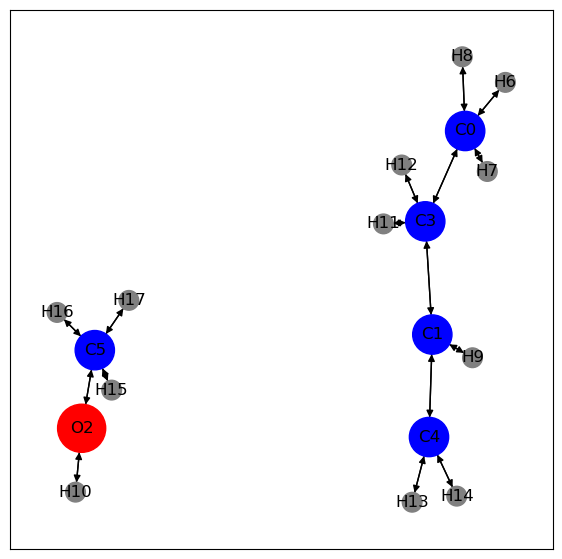

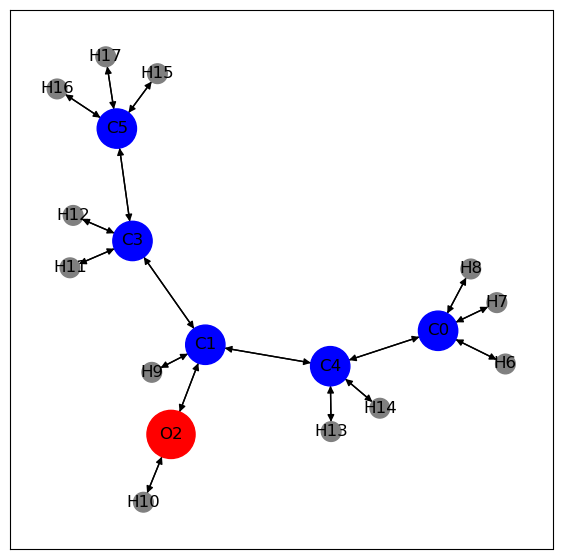

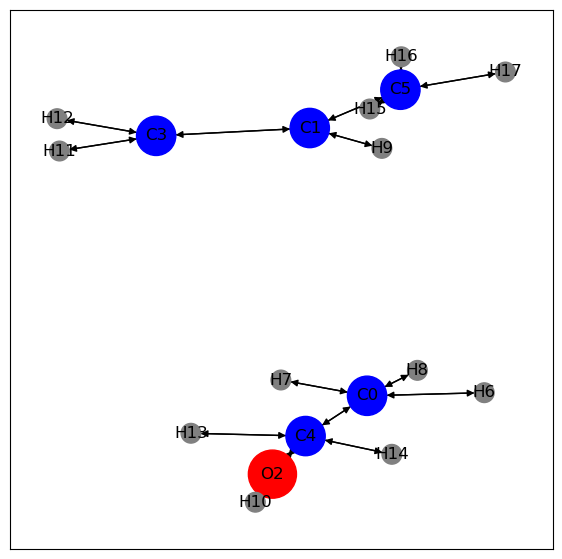

In [18]:
for mol in mols:
    draw_graph_connectivity(mol)

Finally, let's add in unsaturation.

**Buten-2-ol**

/home/benhonore/miniconda3/envs/gtn/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


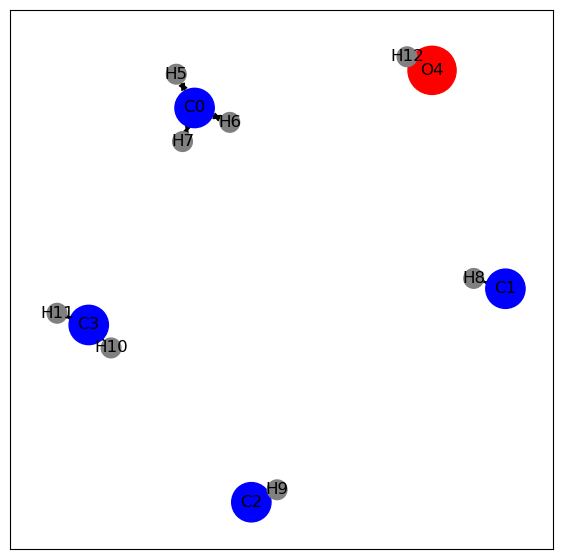

In [19]:
df = pd.read_pickle('small_molecules_testing/but_2_en_1_ol.pkl')
graph, mask = mm.make_full_graph(df)
draw_graph_connectivity(graph)

In [20]:
mols, lmf, count = mm.find_molecules(df, 200)

{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
C1 : 1 bonds
dict:{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
{0: 1, 1: 0, 2: 1, 3: 2, 4: 0}
C0 : 3 bonds
dict:{0: 1, 1: 0, 2: 1, 3: 2, 4: 0}
{0: 0, 1: 0, 2: 1, 3: 1, 4: 0}
C2 : 3 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 1, 4: 0}
bad valency
1
bad valency
2
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
MOLECULE FOUND

{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
C2 : 1 bonds
dict:{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
{0: 1, 1: 3, 2: 0, 3: 0, 4: 0}
C1 : 1 bonds
dict:{0: 1, 1: 3, 2: 0, 3: 0, 4: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 0, 1: 0, 2: 3, 3: 0, 4: 1}
C2 : 1 bonds
dict:{0: 0, 1: 0, 2: 3, 3: 0, 4: 1}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
1

bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 0, 1: 1, 2: 0, 3: 2, 4: 1}
C2 : 4 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 2, 4: 1}
O4 : 1 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 2, 4: 1}
{0: 0, 1: 1, 2: 0, 3: 1, 4: 0}
C2 : 4 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 1, 4: 0}
C1 : 3 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 1, 4: 0}
bad valency
1
bad valency
2
bad valency
3
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
MOLECULE FOUND

{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
C3 : 2 bonds
dict:{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
{0: 1, 1: 3, 2: 2, 3: 0, 4: 0}
C1 : 1 bonds
dict:{0: 1, 1: 3, 2: 2, 3: 0, 4: 0}
bad valency
1
bad valency
2
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
O4 : 1 bonds
dict:{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
{0: 0, 1: 3, 2: 3, 3: 2, 4: 0}
O4 : 2 bonds
dict:{0: 0, 1: 3, 2: 3, 3: 2, 4:

bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 0, 1: 2, 2: 1, 3: 2, 4: 1}
C1 : 2 bonds
dict:{0: 0, 1: 2, 2: 1, 3: 2, 4: 1}
bad valency
1
bad valency
2
{0: 0, 1: 0, 2: 1, 3: 1, 4: 0}
C2 : 3 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 1, 4: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
C0 : 3 bonds
dict:{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
{0: 0, 1: 3, 2: 3, 3: 1, 4: 1}
O4 : 1 bonds
dict:{0: 0, 1: 3, 2: 3, 3: 1, 4: 1}
bad valency
1
{0: 0, 1: 3, 2: 3, 3: 0, 4: 0}
C3 : 4 bonds
dict:{0: 0, 1: 3, 2: 3, 3: 0, 4: 0}
C3 : 4 bonds
dict:{0: 0, 1: 3, 2: 3, 3: 0, 4: 0}
O4 : 2 bonds
dict:{0: 0, 1: 3, 2: 3, 3: 0, 4: 0}
C2 : 1 bonds
dict:{0: 0, 1: 3, 2: 3, 3: 0, 4: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad 

{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
C1 : 1 bonds
dict:{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
{0: 0, 1: 0, 2: 1, 3: 2, 4: 1}
C1 : 4 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 2, 4: 1}
C1 : 4 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 2, 4: 1}
C2 : 3 bonds
dict:{0: 0, 1: 0, 2: 1, 3: 2, 4: 1}
{0: 0, 1: 0, 2: 0, 3: 1, 4: 1}
O4 : 1 bonds
dict:{0: 0, 1: 0, 2: 0, 3: 1, 4: 1}
bad valency
1
bad valency
2
bad valency
3
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
C2 : 1 bonds
dict:{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
{0: 0, 1: 2, 2: 0, 3: 1, 4: 1}
C3 : 3 bonds
dict:{0: 0, 1: 2, 2: 0, 3: 1, 4: 1}
{0: 0, 1: 1, 2: 0, 3: 0, 4: 1}
C3 : 4 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 1}
C0 : 4 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 1}
C3 : 4 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 1}
C2 : 4 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 1}
C1 : 3 bonds
dict:{0: 0, 1: 1, 2: 0, 3: 0, 4: 1}
bad valency
1
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
C3 : 2 bonds
dict:{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
{0: 0, 1: 3, 2: 2, 3: 0, 4: 

bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
bad valency
22
bad valency
23
bad valency
24
{0: 1, 1: 1, 2: 0, 3: 2, 4: 0}
O4 : 2 bonds
dict:{0: 1, 1: 1, 2: 0, 3: 2, 4: 0}
C2 : 4 bonds
dict:{0: 1, 1: 1, 2: 0, 3: 2, 4: 0}
C2 : 4 bonds
dict:{0: 1, 1: 1, 2: 0, 3: 2, 4: 0}
C1 : 3 bonds
dict:{0: 1, 1: 1, 2: 0, 3: 2, 4: 0}
{0: 1, 1: 0, 2: 0, 3: 1, 4: 0}
C2 : 4 bonds
dict:{0: 1, 1: 0, 2: 0, 3: 1, 4: 0}
C0 : 3 bonds
dict:{0: 1, 1: 0, 2: 0, 3: 1, 4: 0}
bad valency
1
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
C0 : 3 bonds
dict:{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
{0: 0, 1: 2, 2: 3, 3: 2, 4: 1}
C1 : 2 bonds
dict:{0: 0, 1: 2, 2: 3, 3: 2, 4: 1}
{0: 0, 1: 0, 2: 2, 3: 2, 4: 0}
O4 : 2 bonds
dict:{0: 0, 1: 0, 2: 2, 3: 2, 4: 0}
C1 : 4 bonds
dict:{0: 0, 1: 0, 2: 2, 3: 2, 4: 0}
O4 : 2 bonds
dict:{0: 0, 1: 0, 2: 2, 3: 2, 4: 0}
O4 : 2 bonds
dict:{0: 0, 1: 0, 2: 2, 3: 2, 4: 0}
C3

{0: 0, 1: 3, 2: 1, 3: 2, 4: 0}
C0 : 4 bonds
dict:{0: 0, 1: 3, 2: 1, 3: 2, 4: 0}
C1 : 1 bonds
dict:{0: 0, 1: 3, 2: 1, 3: 2, 4: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency
12
bad valency
13
bad valency
14
bad valency
15
bad valency
16
bad valency
17
bad valency
18
bad valency
19
bad valency
20
bad valency
21
{0: 1, 1: 0, 2: 2, 3: 1, 4: 0}
C1 : 4 bonds
dict:{0: 1, 1: 0, 2: 2, 3: 1, 4: 0}
C2 : 2 bonds
dict:{0: 1, 1: 0, 2: 2, 3: 1, 4: 0}
bad valency
1
bad valency
2
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
C1 : 1 bonds
dict:{0: 1, 1: 3, 2: 3, 3: 2, 4: 1}
{0: 1, 1: 0, 2: 3, 3: 0, 4: 0}
C3 : 4 bonds
dict:{0: 1, 1: 0, 2: 3, 3: 0, 4: 0}
C2 : 1 bonds
dict:{0: 1, 1: 0, 2: 3, 3: 0, 4: 0}
bad valency
1
bad valency
2
bad valency
3
bad valency
4
bad valency
5
bad valency
6
bad valency
7
bad valency
8
bad valency
9
bad valency
10
bad valency
11
bad valency


In [21]:
len(mols)

9

This search took 2 or 3 seconds to decide there are 9 possible molecules.

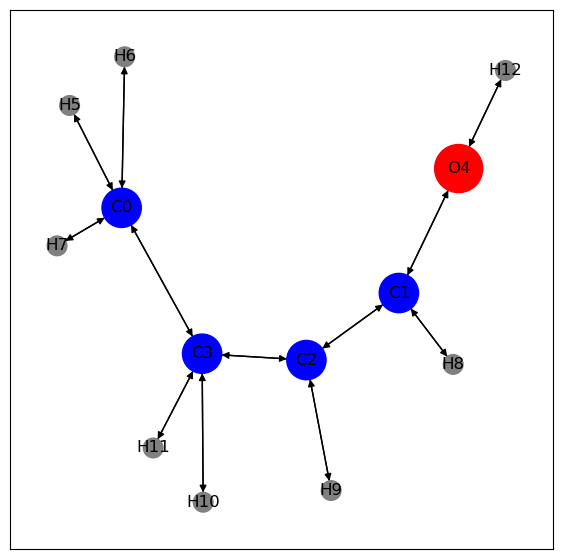

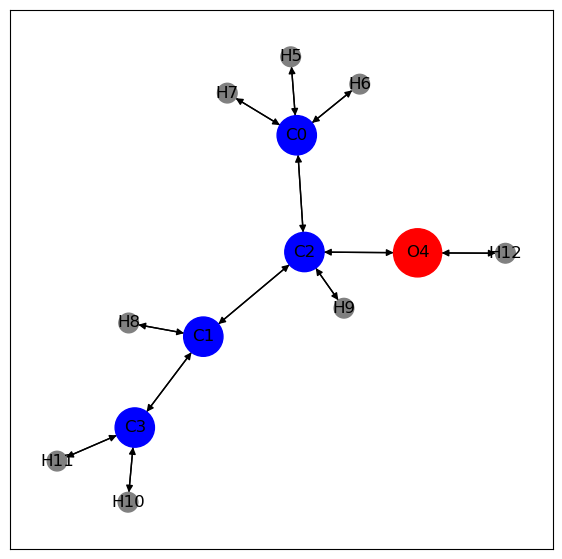

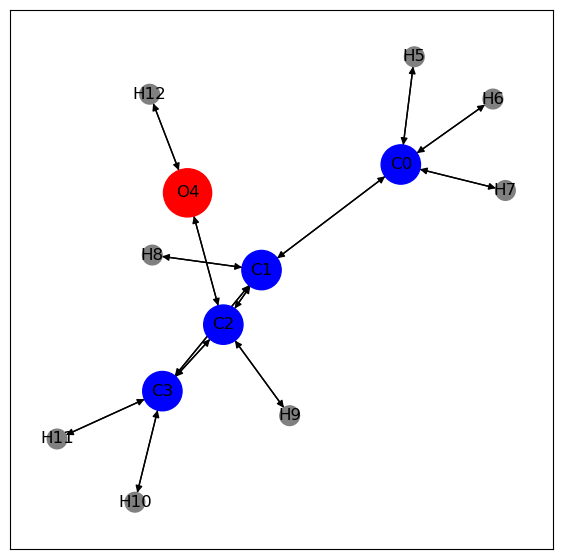

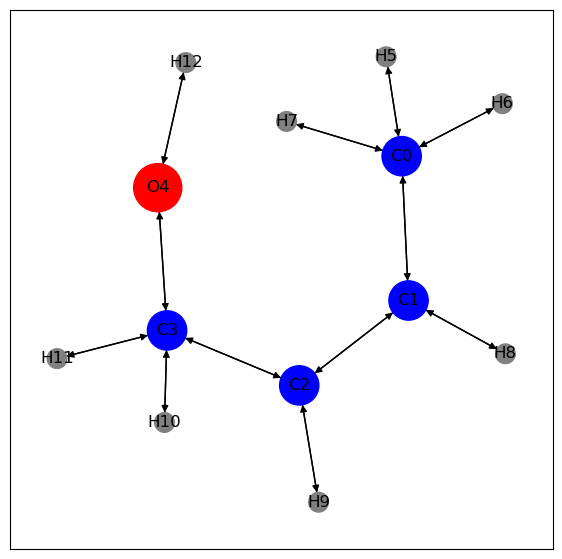

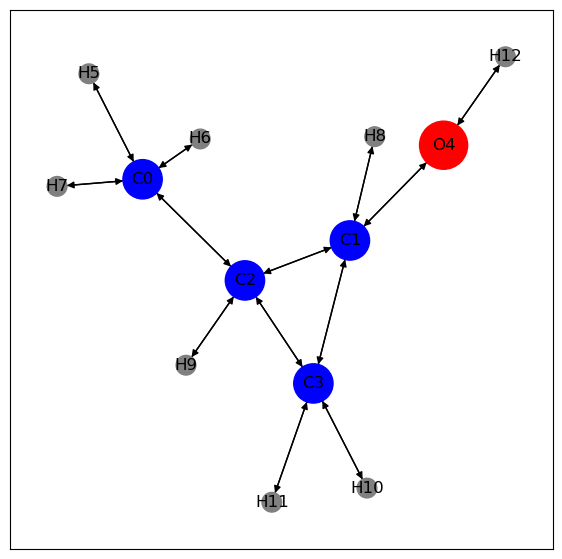

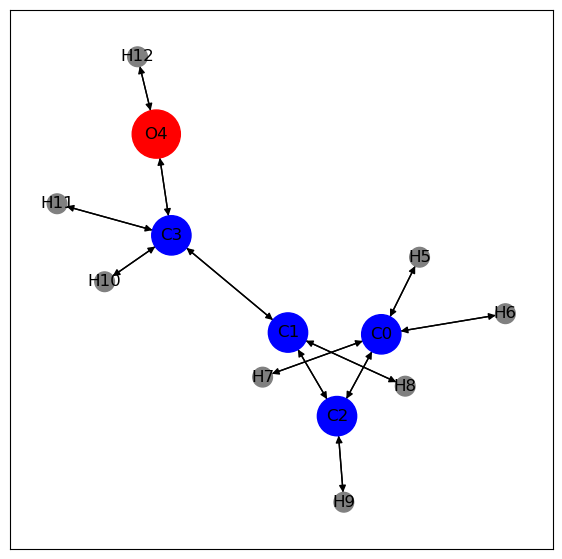

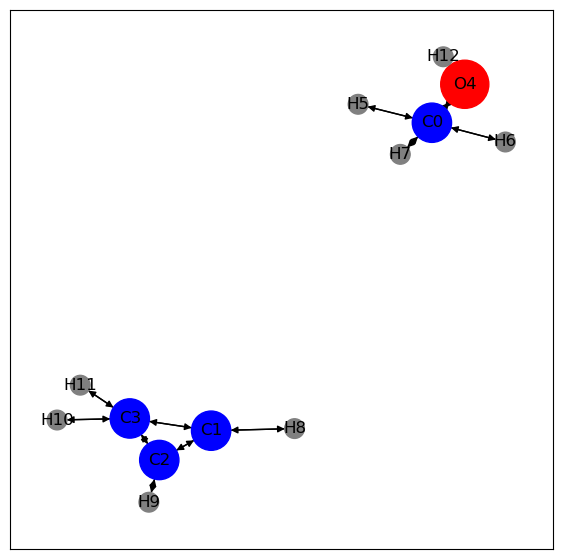

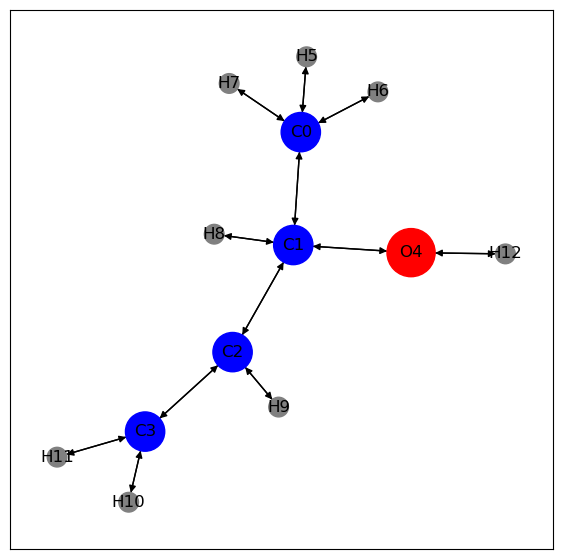

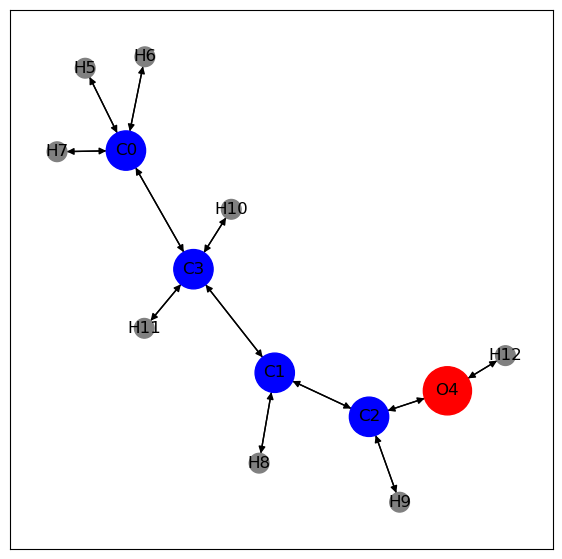

In [22]:
for mol in mols:
    draw_graph_connectivity(mol)